In [3]:
import os
import sys
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from keras import Model, preprocessing
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers import Input, Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# VARIÁVEIS GLOBAIS

In [6]:
WIDTH = HEIGHT = 240

TRAIN_MODEL = True

LEARNING_RATE = 0.001
BATCH_SIZE = 4
EPOCHS = 32

# CARREGANDO IMAGENS PARA O TENSORFLOW

In [7]:
current_directory = os.path.abspath(os.getcwd())
numbers_directory = current_directory + '/organizedCharacters/numbers'

training_directory = numbers_directory + '/training'
test_directory = numbers_directory + '/test'
validation_directory = numbers_directory + '/validation'

training_dataset = preprocessing.image_dataset_from_directory(training_directory, label_mode='categorical', image_size=(WIDTH, HEIGHT), batch_size=BATCH_SIZE)
validation_dataset = preprocessing.image_dataset_from_directory(validation_directory, label_mode='categorical', image_size=(WIDTH, HEIGHT), batch_size=BATCH_SIZE)
test_dataset = preprocessing.image_dataset_from_directory(test_directory, label_mode='categorical', image_size=(WIDTH, HEIGHT), batch_size=BATCH_SIZE)

Found 9188 files belonging to 10 classes.
Found 1260 files belonging to 10 classes.
Found 2552 files belonging to 10 classes.


# CONSTRUINDO ARQUITETURA DA REDE

In [11]:
def buildNeuralNetwork():

    # camada de entrada
    model_input = Input((HEIGHT, WIDTH, 3))
    model_input = Rescaling(scale=1.0/255)(model_input)

    # 1a camada
    model = Conv2D(4, kernel_size=3, padding='same', activation='relu')(model_input)
    model = MaxPooling2D (padding='same')(model)

    # 2a camada
    model = Conv2D(8, kernel_size=3, padding='same', activation='relu')(model_input)
    model = MaxPooling2D (padding='same')(model)

    # 3a camada
    model = Conv2D(16, kernel_size=3, padding='same', activation='relu')(model_input)
    model = MaxPooling2D (padding='same')(model)

    # camadas conectadas
    model = Flatten()(model)
    model = Dense(24, activation='relu')(model)
    model = Dropout(0.2)(model)
    model = Dense(10, activation='softmax')(model)

    return Model(model_input, model)

# TREINANDO A REDE NEURAL

In [9]:
def trainModel(model):

   checkpoint = ModelCheckpoint('saved.h5', save_best_only=True, monitor='val_accuracy', mode='max', save_freq='epoch')
   history = model.fit (training_dataset, epochs = EPOCHS, batch_size=BATCH_SIZE, validation_data=validation_dataset, callbacks=[checkpoint])
   
   plt.plot (history.history ['loss'])
   plt.plot (history.history['val_loss'])
   plt.ylabel ('loss')
   plt.xlabel ('epoch')
   plt.legend (['train', 'validation'], loc='upper left')
   plt.savefig ('training.png')

   plt.clf ()
   plt.plot (history.history ['accuracy'])
   plt.plot (history.history ['val_accuracy'])
   plt.ylabel ('accuracy')
   plt.xlabel ('epoch')
   plt.legend (['train', 'validation'], loc='upper left')
   plt.savefig ('training_acc.png')

# MAIN

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 240, 240, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 120, 120, 16)      0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 230400)            0         
                                                                 
 dense_4 (Dense)             (None, 24)                5529624   
                                                                 
 dropout_2 (Dropout)         (None, 24)                0         
                                                           

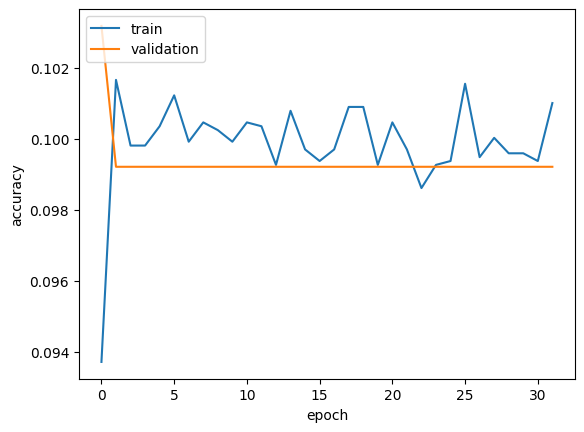

In [13]:
def main():
    
    model = buildNeuralNetwork()
    model.summary()
    model.compile(optimizer = Adam(learning_rate=LEARNING_RATE), loss='categorical_crossentropy', metrics=['accuracy'])

    if TRAIN_MODEL:
        trainModel(model)
    else:
        model.load_weights("saved(13000 samples).h5")
        _, test_acc = model.evaluate(test_dataset)
        print(f"Test accuracy: {test_acc:.3f}")


if __name__ == '__main__':
    main()